In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from datetime import datetime, timedelta
import spiceypy
import healpy
import scipy
import image3d
from importlib import reload
reload(image3d)


<module 'image3d' from '/Users/ruby/Astro/radio3D/image3d.py'>

In [38]:
u_vals = image3d.get_u(freq_hz=70e6)

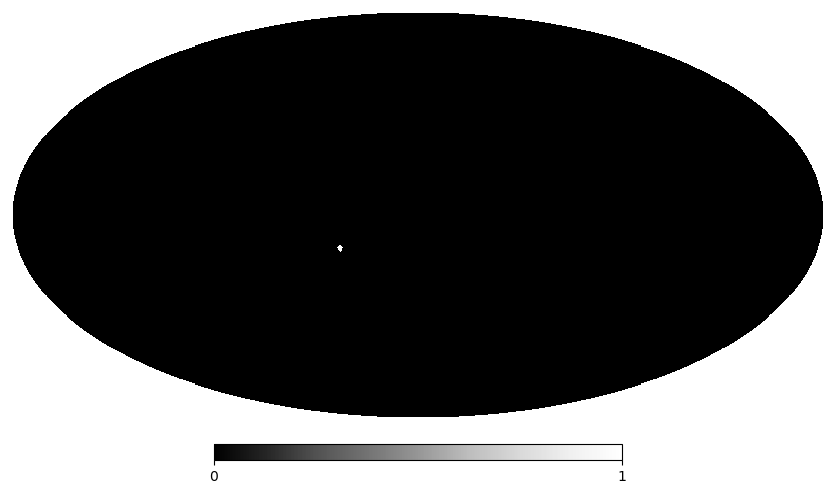

In [39]:
# Create a map to simulate
nside = 32
npix = healpy.nside2npix(nside)
healpix_pixel_vals = np.zeros(npix, dtype=float)

# Create a single source at an arbitrary pixel
healpix_pixel_vals[int(.6*npix)] = 2

# Plot
proj = healpy.mollview(
    map=healpix_pixel_vals,
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="",
    min=0,
    max=1,
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

In [40]:
visibilities = image3d.simulate_visibilities(
    u_vals,
    healpix_pixel_vals,
)

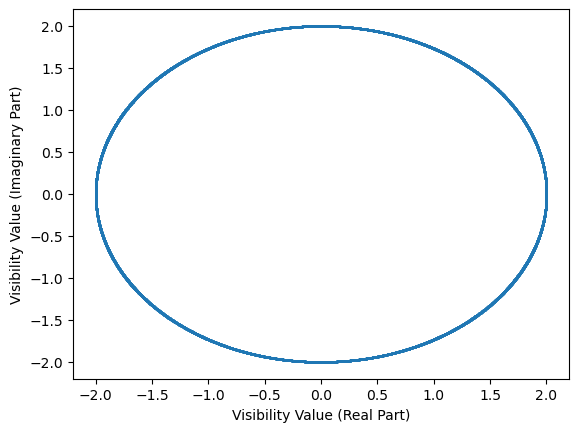

In [41]:
# Confirm that the visibilites are consistent with a single point source
plt.plot(np.real(visibilities), np.imag(visibilities), ".", markersize=1)
plt.xlabel("Visibility Value (Real Part)")
plt.ylabel("Visibility Value (Imaginary Part)")
plt.show()

In [ ]:
reconstructed_pixel_vals = image3d.pixel_based_imaging(
    visibilities,
    u_vals,
    nside,
)

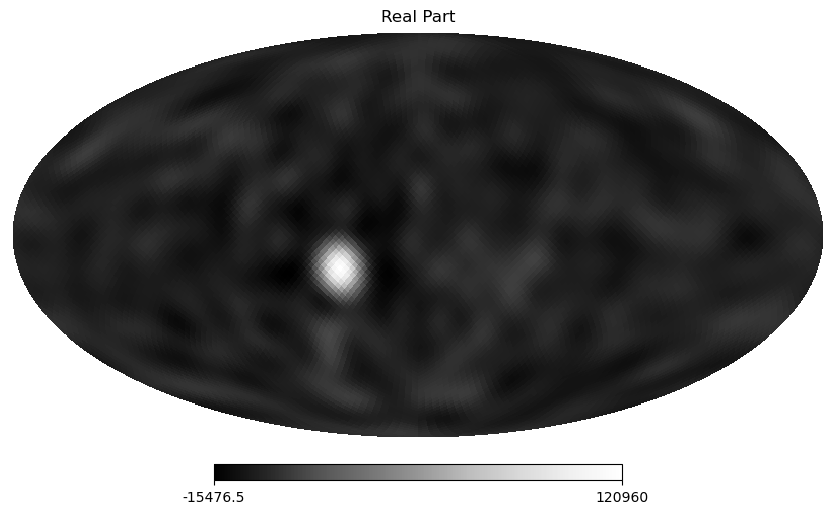

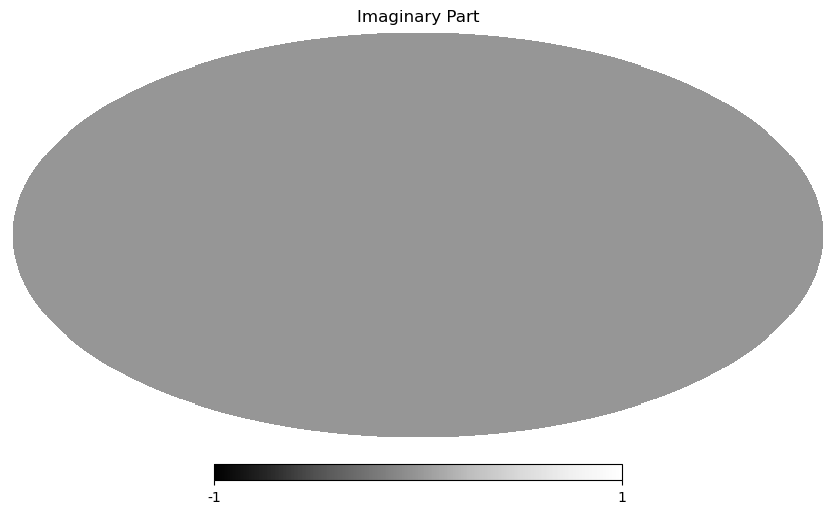

In [ ]:
proj = healpy.mollview(
    map=np.real(reconstructed_pixel_vals),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Real Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
proj = healpy.mollview(
    map=np.imag(reconstructed_pixel_vals),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Imaginary Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)

In [44]:
# Spherical harmonic reconstruction
l_max = 20
alms, l_vals, m_vals = image3d.spherical_harmonic_imaging(
    visibilities,
    u_vals,
    l_max,
)

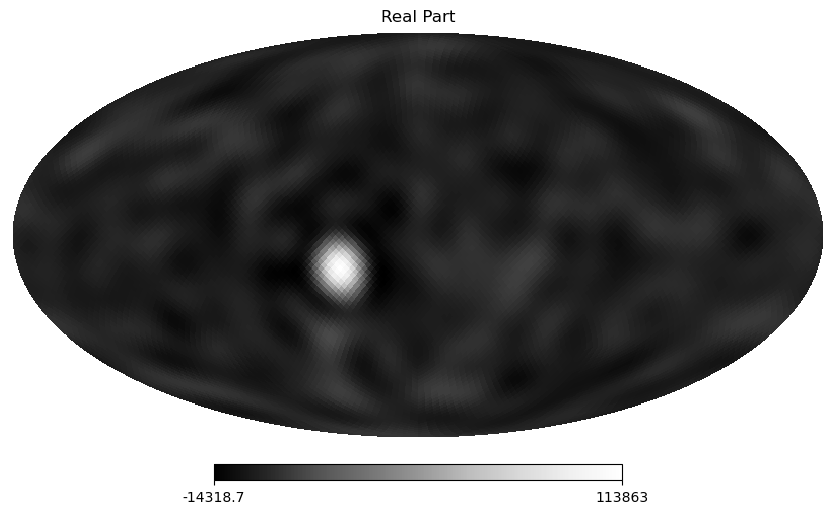

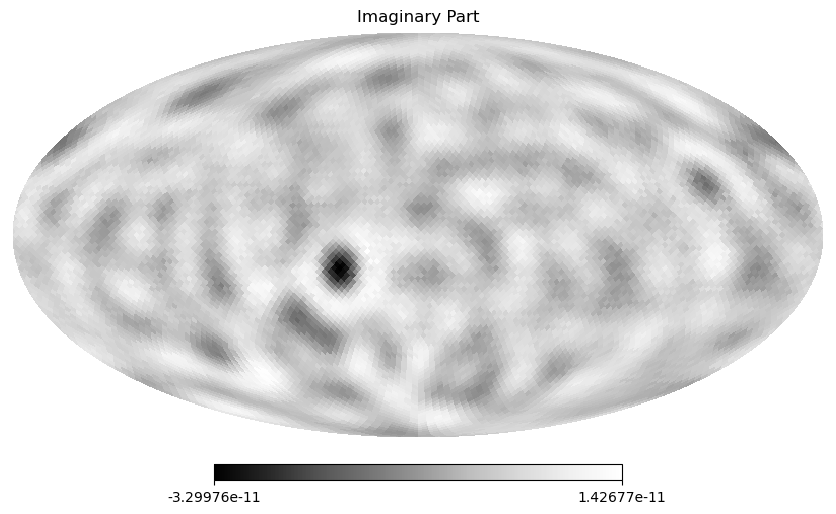

In [ ]:
reconstructed_pixel_vals_spherical = image3d.alms_to_map(
    alms,
    l_vals,
    m_vals,
    nside,
    mirror_m=False,
)
proj = healpy.mollview(
    map=np.real(reconstructed_pixel_vals_spherical),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Real Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()
proj = healpy.mollview(
    map=np.imag(reconstructed_pixel_vals_spherical),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Imaginary Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

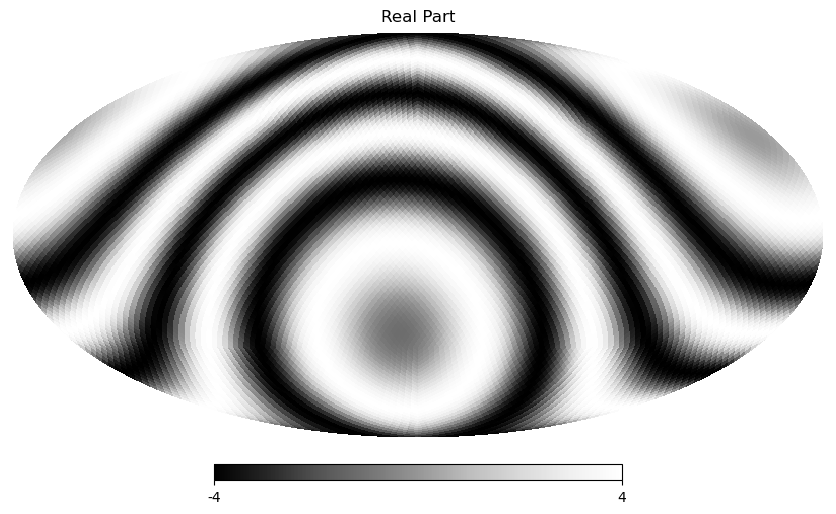

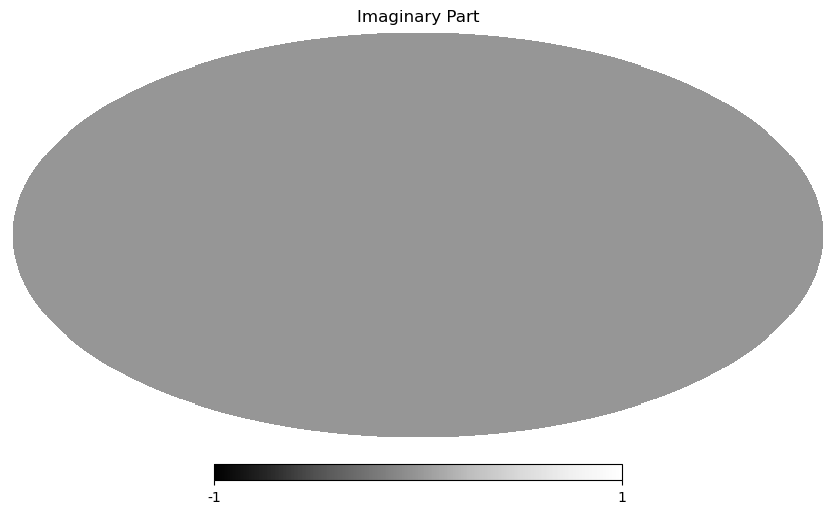

In [46]:
# Test single baselines
reconstructed_pixel_vals_single_bl = image3d.pixel_based_imaging(
    visibilities[[0]],
    u_vals[:, [0]],
    nside,
)
proj = healpy.mollview(
    map=np.real(reconstructed_pixel_vals_single_bl),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Real Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
proj = healpy.mollview(
    map=np.imag(reconstructed_pixel_vals_single_bl),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Imaginary Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)

In [47]:
l_max = 30
alms_single_bl, l_vals, m_vals = image3d.spherical_harmonic_imaging(
    visibilities[[0]],
    u_vals[:,[0]],
    l_max,
)
reconstructed_pixel_vals_single_bl_spherical = image3d.alms_to_map(
    alms_single_bl,
    l_vals,
    m_vals,
    nside,
    mirror_m=False,
)

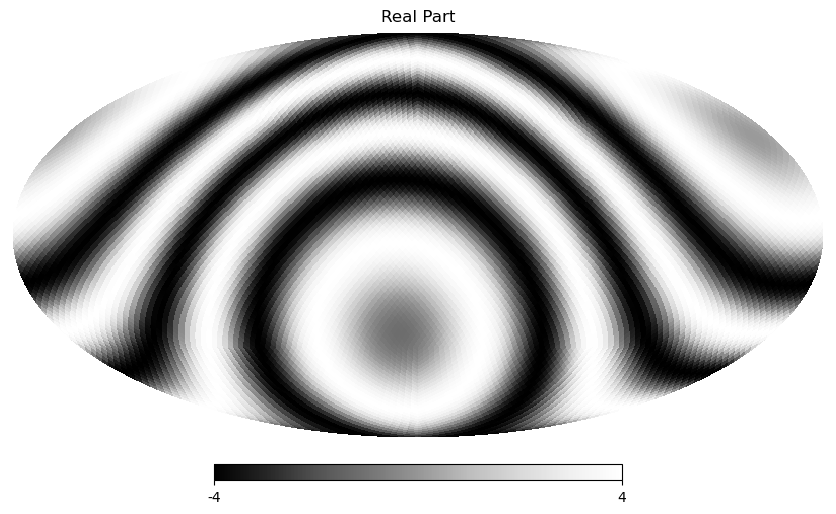

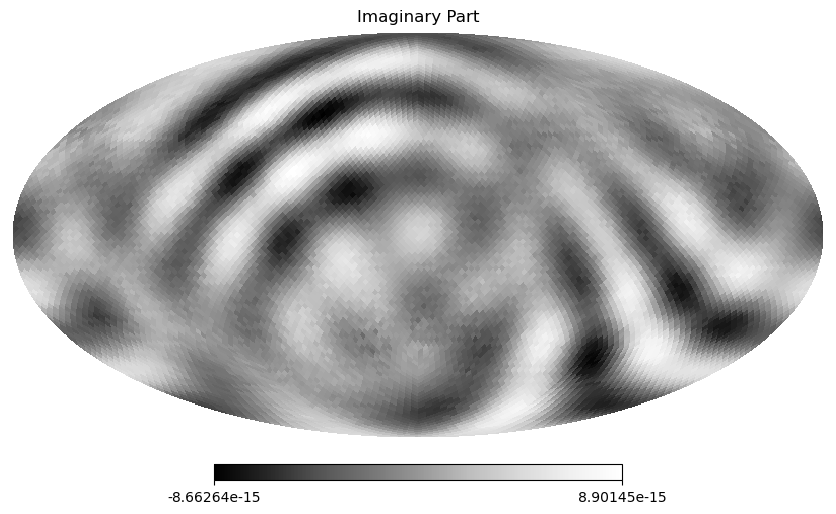

In [48]:
proj = healpy.mollview(
    map=np.real(reconstructed_pixel_vals_single_bl_spherical),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Real Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
proj = healpy.mollview(
    map=np.imag(reconstructed_pixel_vals_single_bl_spherical),
    coord="C",  # Assume map is in celestial coordinates
    nest=False,
    title="Imaginary Part",
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)

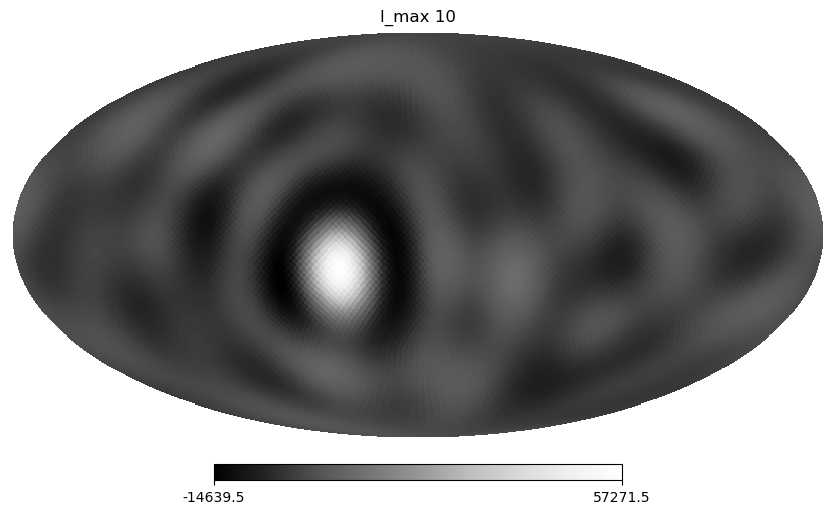

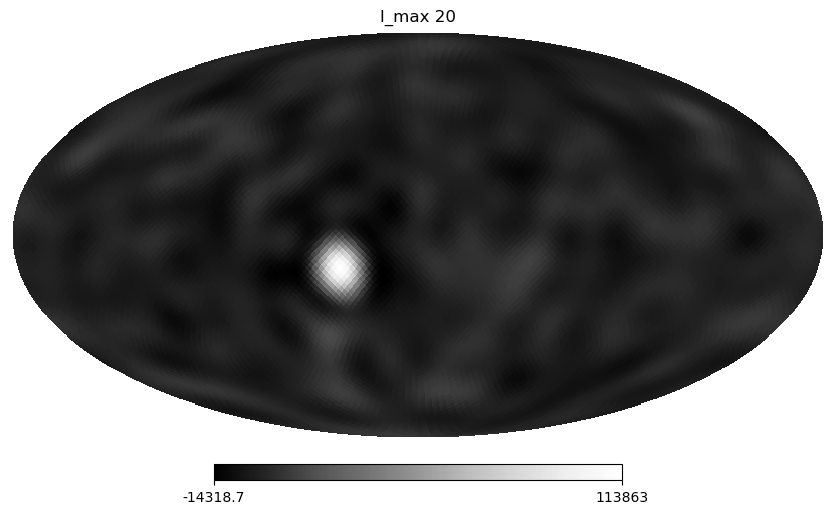

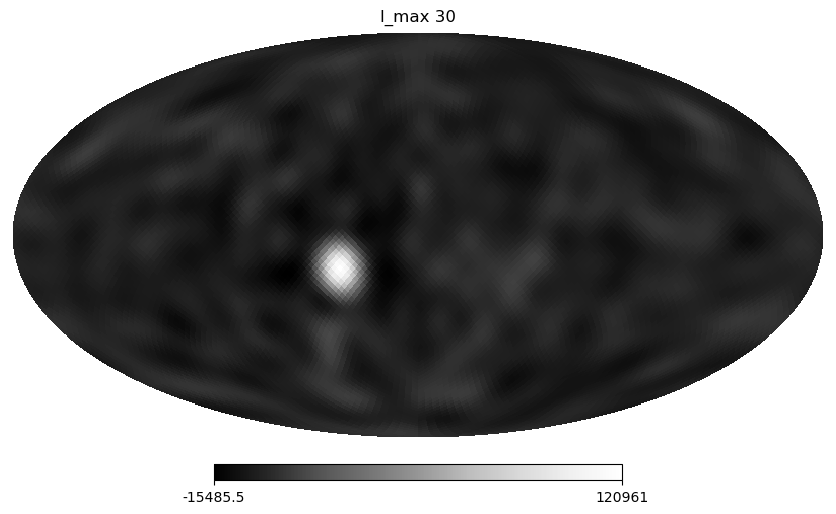

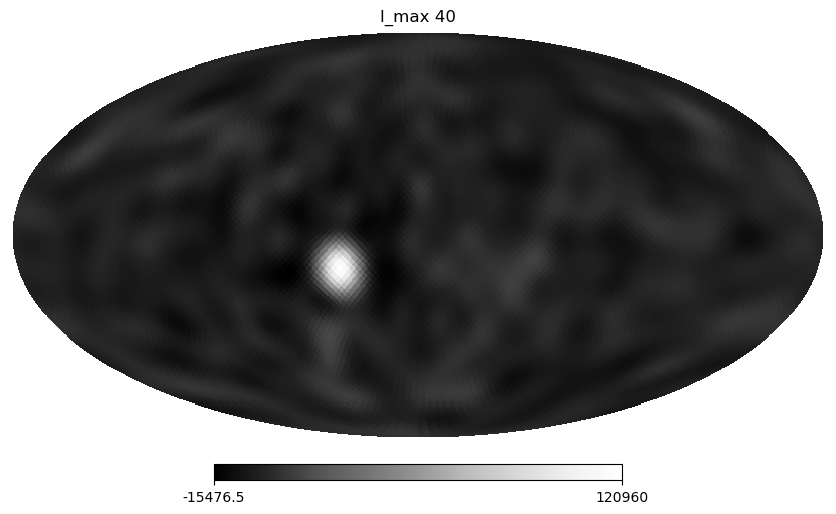

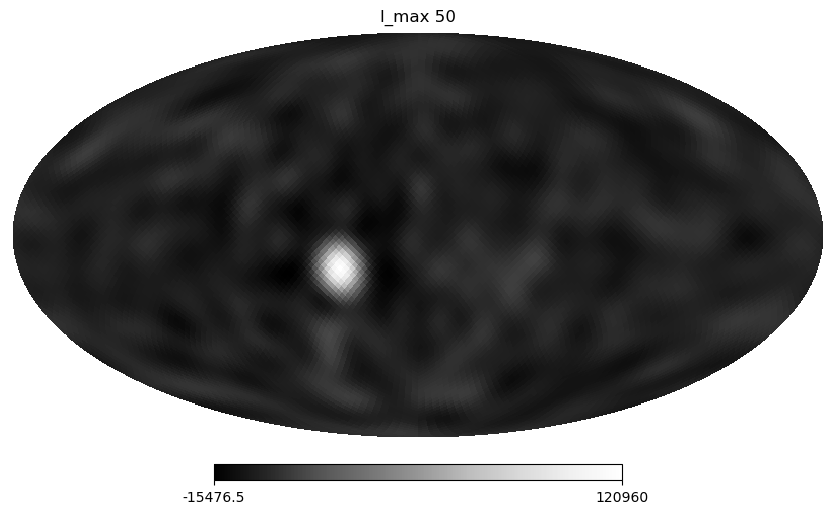

In [49]:
# Test the impact of l_max
for l_max in [10, 20, 30, 40, 50]:
    alms, l_vals, m_vals = image3d.spherical_harmonic_imaging(
        visibilities,
        u_vals,
        l_max,
    )
    reconstructed_pixel_vals_lmax_test = image3d.alms_to_map(
        alms,
        l_vals,
        m_vals,
        nside,
        mirror_m=False,
    )
    proj = healpy.mollview(
        map=np.real(reconstructed_pixel_vals_lmax_test),
        coord="C",  # Assume map is in celestial coordinates
        nest=False,
        title=f"l_max {l_max}",
        cbar=True,
        cmap='Greys_r',
        return_projected_map=False,
        notext=True,
        unit=None
    )
    plt.show()